### Feature Engineering

- 3 - Modeling the dataset.
  - read feather file.
  - create the feature - target.
  - Save feather format.

In [141]:
import feather
import pandas as pd
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, chi2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [142]:
# Get start time 
start_time = time.time()

In [143]:
# loading data feather format
df_covid = pd.read_feather('../dataset/feather/featureselection.ftr')
df_covid

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,ALIVE_OR_DIED
0,2,1,1,1,97,1,65,2,2,2,...,2,1,2,2,2,2,2,3,97,Died
1,2,1,2,1,97,1,72,97,2,2,...,2,1,2,2,1,1,2,5,97,Died
2,2,1,2,2,1,2,55,97,1,2,...,2,2,2,2,2,2,2,3,2,Died
3,2,1,1,1,97,2,53,2,2,2,...,2,2,2,2,2,2,2,7,97,Died
4,2,1,2,1,97,2,68,97,1,2,...,2,1,2,2,2,2,2,3,97,Died
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,97,2,40,97,2,2,...,2,2,2,2,2,2,2,7,97,Alive
1048571,1,13,2,2,2,2,51,97,2,2,...,2,1,2,2,2,2,2,7,2,Alive
1048572,2,13,2,1,97,2,55,97,2,2,...,2,2,2,2,2,2,2,7,97,Alive
1048573,2,13,2,1,97,2,28,97,2,2,...,2,2,2,2,2,2,2,7,97,Alive


In [144]:
# Alternatively X and y can be obtained directly from the dataframe attribute:
X = df_covid.drop('ALIVE_OR_DIED', axis=1) # drop the column target
y = df_covid['ALIVE_OR_DIED'] # target

In [145]:
X_new = SelectKBest(f_classif, k=19).fit_transform(X, y)

In [146]:
# Split-out validation dataset
X_train, X_validation, Y_train, Y_validation = train_test_split(X_new, y, test_size=0.2, random_state=1)

In [147]:
model = RandomForestClassifier(max_depth=15, random_state=0, n_jobs=-1) 

# fitting
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(f'score:....................: {accuracy_score(Y_validation, predictions)}')


score:....................: 0.9518060224590515


In [148]:
list_name_features = []
index = 1

for feat, importance in zip(df_covid.columns, model.feature_importances_):
    importance = round(importance*100, 2)
    print(f'{index} - feature: {feat}, importance: {importance} %')
    list_name_features.append(feat)
    index += 1

1 - feature: USMER, importance: 0.88 %
2 - feature: MEDICAL_UNIT, importance: 3.45 %
3 - feature: SEX, importance: 0.39 %
4 - feature: PATIENT_TYPE, importance: 18.2 %
5 - feature: INTUBED, importance: 23.33 %
6 - feature: PNEUMONIA, importance: 11.7 %
7 - feature: AGE, importance: 13.61 %
8 - feature: PREGNANT, importance: 0.48 %
9 - feature: DIABETES, importance: 2.05 %
10 - feature: COPD, importance: 0.45 %
11 - feature: ASTHMA, importance: 0.28 %
12 - feature: INMSUPR, importance: 0.4 %
13 - feature: HIPERTENSION, importance: 0.47 %
14 - feature: OTHER_DISEASE, importance: 0.43 %
15 - feature: CARDIOVASCULAR, importance: 0.63 %
16 - feature: OBESITY, importance: 0.7 %
17 - feature: RENAL_CHRONIC, importance: 0.43 %
18 - feature: TOBACCO, importance: 6.13 %
19 - feature: CLASIFFICATION_FINAL, importance: 15.98 %


In [149]:
#print(confusion_matrix(Y_validation, predictions))
#print(classification_report(Y_validation, predictions))
 
#The importance of a feature is computed as the (normalized) total reduction 
# of the criterion brought by that feature. See scikit learn documentation.
list_feat_importances = list(model.feature_importances_)
dict_feat_importances = {}
#
i=0

for ilist in list_name_features:
    dict_feat_importances[ilist] = list_feat_importances[i]*100 # porcentagem %
    print(f"{ilist}.......: {round(dict_feat_importances[ilist], 2)} %")
    i=i+1

USMER.......: 0.88 %
MEDICAL_UNIT.......: 3.45 %
SEX.......: 0.39 %
PATIENT_TYPE.......: 18.2 %
INTUBED.......: 23.33 %
PNEUMONIA.......: 11.7 %
AGE.......: 13.61 %
PREGNANT.......: 0.48 %
DIABETES.......: 2.05 %
COPD.......: 0.45 %
ASTHMA.......: 0.28 %
INMSUPR.......: 0.4 %
HIPERTENSION.......: 0.47 %
OTHER_DISEASE.......: 0.43 %
CARDIOVASCULAR.......: 0.63 %
OBESITY.......: 0.7 %
RENAL_CHRONIC.......: 0.43 %
TOBACCO.......: 6.13 %
CLASIFFICATION_FINAL.......: 15.98 %


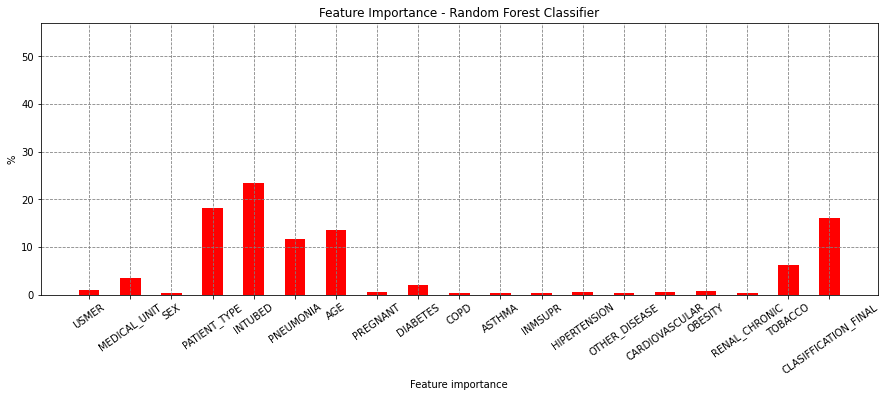

In [150]:
# feature importance
plt.figure(figsize=(15,5))
plt.bar(dict_feat_importances.keys(),dict_feat_importances.values(), width=.5, color='r')
plt.ylim(0,57)
plt.title("Feature Importance - Random Forest Classifier")
plt.ylabel("%")
plt.xlabel("Feature importance")
plt.xticks(rotation=35)
plt.grid(color='gray', linestyle='dashed')
plt.show()